In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    "id": [1,2,3,4,5,6],
    "raw_grades": ["A","B","C","E","D","A"]
})
df["grade"] = df["raw_grades"].astype("category")
df["grade"] = df["grade"].cat.set_categories(["very bad","bad","medium","good","very good"])
df

,id,raw_grades,grade
0,1,A,NaN
1,2,B,NaN
2,3,C,NaN
3,4,E,NaN
4,5,D,NaN
5,6,A,NaN


In [3]:
df = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6],
    "raw_grades": ["A", "B", "C", "E", "D", "A"]
})
df["grade"] = df["raw_grades"].astype("category")
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

grade_mapping = {'A': 'very good', 'B': 'good', 'C': 'medium', 'D': 'bad', 'E': 'very bad'}
df["grade"] = df["raw_grades"].map(grade_mapping)
df_sorted = df.sort_values(by="grade")
grouped_size = df_sorted.groupby("grade").size()
print(grouped_size)
df

grade
bad          1
good         1
medium       1
very bad     1
very good    2
dtype: int64


,id,raw_grades,grade
0,1,A,very good
1,2,B,good
2,3,C,medium
3,4,E,very bad
4,5,D,bad
5,6,A,very good


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# task-1: Data exploration

In [5]:
print("Numbetr of rows:",df.shape[0],"and columns:",df.shape[1])

Numbetr of rows: 150 and columns: 5


In [6]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
df.describe(include="all")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# TAsk-2: data selection

In [9]:
sepal_df = df[["sepal length (cm)","sepal width (cm)"]]
sepal_df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [10]:
df[df["petal length (cm)"]>4.5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
58,6.6,2.9,4.6,1.3,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# task-3: data manipulation

In [11]:
df["sepal_area"] = df["sepal length (cm)"] * df["sepal width (cm)"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10
146,6.3,2.5,5.0,1.9,virginica,15.75
147,6.5,3.0,5.2,2.0,virginica,19.50
148,6.2,3.4,5.4,2.3,virginica,21.08


In [12]:
df["target"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
grade_mapping = {'setosa': 1, 'versicolor':2, 'virginica': 3}
df["target"] = df["target"].map(grade_mapping)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area
0,5.1,3.5,1.4,0.2,1,17.85
1,4.9,3.0,1.4,0.2,1,14.70
2,4.7,3.2,1.3,0.2,1,15.04
3,4.6,3.1,1.5,0.2,1,14.26
4,5.0,3.6,1.4,0.2,1,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,20.10
146,6.3,2.5,5.0,1.9,3,15.75
147,6.5,3.0,5.2,2.0,3,19.50
148,6.2,3.4,5.4,2.3,3,21.08


# task -4: data analysis

In [14]:
grade_mapping = {1: 'setosa', 2: 'versicolor', 3: 'virginica'}
df["species"] = df["target"].map(grade_mapping)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species
0,5.1,3.5,1.4,0.2,1,17.85,setosa
1,4.9,3.0,1.4,0.2,1,14.70,setosa
2,4.7,3.2,1.3,0.2,1,15.04,setosa
3,4.6,3.1,1.5,0.2,1,14.26,setosa
4,5.0,3.6,1.4,0.2,1,18.00,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,20.10,virginica
146,6.3,2.5,5.0,1.9,3,15.75,virginica
147,6.5,3.0,5.2,2.0,3,19.50,virginica
148,6.2,3.4,5.4,2.3,3,21.08,virginica


In [15]:
avg_sepal_length_by_species = df.groupby('species')['sepal length (cm)'].mean()
print("Average sepal length for each species:")
avg_sepal_length_by_species

Average sepal length for each species:


species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64

In [16]:
df.sepal_area.max()

30.02

# task-5: data filtering

In [17]:
filtered_data = df[(df['sepal length (cm)'] < 5) & (df['petal width (cm)'] > 1)]
filtered_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species
106,4.9,2.5,4.5,1.7,3,12.25,virginica


# task-6: Data aggregation

In [18]:
df['species'] = iris.target_names[iris.target]
max_petal_length_by_species = df.groupby('species')['petal length (cm)'].max()
print("Maximum petal length for each species:")
max_petal_length_by_species

Maximum petal length for each species:


species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal length (cm), dtype: float64

In [19]:
df['species'] = iris.target_names[iris.target]
sepal_length_stats_by_species = df.groupby('species')['sepal length (cm)'].agg(['min', 'max'])
print("Minimum and maximum sepal length for each species:")
sepal_length_stats_by_species

Minimum and maximum sepal length for each species:


,min,max
species,,
setosa,4.3,5.8
versicolor,4.9,7.0
virginica,4.9,7.9


# Task-7: data visualization

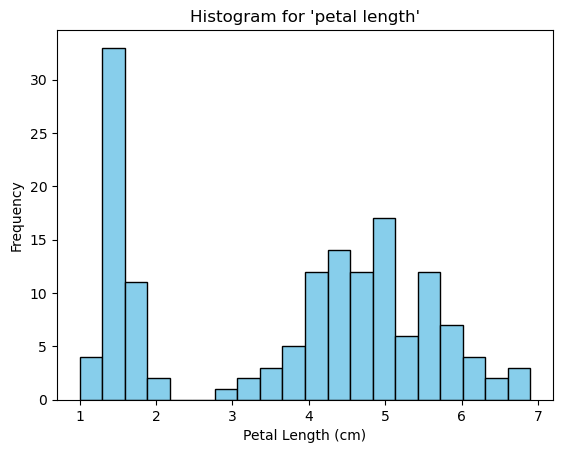

In [20]:
df["petal length (cm)"].plot(kind="hist", bins=20, color = "skyblue", edgecolor="black")
plt.title("Histogram for 'petal length'")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()

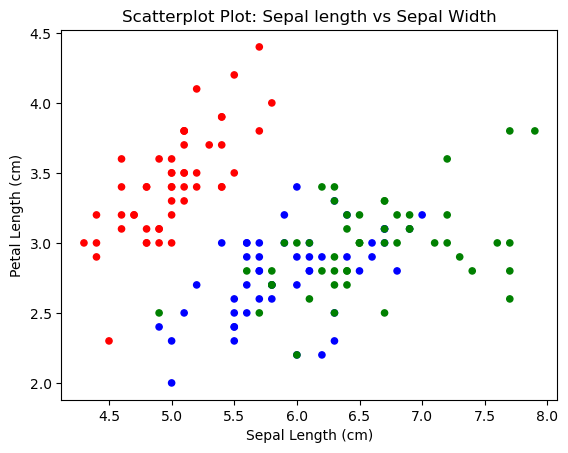

In [21]:
color = {
    1:"red",
    2:"blue",
    3:"green"
}
df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)", c= df["target"].map(color))
plt.title("Scatterplot Plot: Sepal length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show()

# task-8: data merging

In [22]:
random_data = pd.DataFrame(np.random.rand(len(df), 3), columns=['random_col1', 'random_col2', 'random_col3'])
merged_df = pd.merge(df, random_data, left_on='target', right_index=True)
merged_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species,random_col1,random_col2,random_col3
0,5.1,3.5,1.4,0.2,1,17.85,setosa,0.216517,0.949173,0.424440
1,4.9,3.0,1.4,0.2,1,14.70,setosa,0.216517,0.949173,0.424440
2,4.7,3.2,1.3,0.2,1,15.04,setosa,0.216517,0.949173,0.424440
3,4.6,3.1,1.5,0.2,1,14.26,setosa,0.216517,0.949173,0.424440
4,5.0,3.6,1.4,0.2,1,18.00,setosa,0.216517,0.949173,0.424440
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,20.10,virginica,0.388368,0.730671,0.941418
146,6.3,2.5,5.0,1.9,3,15.75,virginica,0.388368,0.730671,0.941418
147,6.5,3.0,5.2,2.0,3,19.50,virginica,0.388368,0.730671,0.941418
148,6.2,3.4,5.4,2.3,3,21.08,virginica,0.388368,0.730671,0.941418


# task-9: data grouping

In [23]:
grouped_means = df.groupby('target').mean()
grouped_means

C:\Users\meetu\AppData\Local\Temp\ipykernel_2172\2021128539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_means = df.groupby('target').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area
target,,,,,
1,5.006,3.428,1.462,0.246,17.2578
2,5.936,2.770,4.260,1.326,16.5262
3,6.588,2.974,5.552,2.026,19.6846


# task- 10: data pivot

In [24]:
pivot_table = pd.pivot_table(df, values='sepal length (cm)', index='species', aggfunc='mean')
pivot_table

,sepal length (cm)
species,
setosa,5.006
versicolor,5.936
virginica,6.588


# task- 11: data transformation

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species
0,5.1,3.5,1.4,0.2,1,17.85,setosa
1,4.9,3.0,1.4,0.2,1,14.70,setosa
2,4.7,3.2,1.3,0.2,1,15.04,setosa
3,4.6,3.1,1.5,0.2,1,14.26,setosa
4,5.0,3.6,1.4,0.2,1,18.00,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,20.10,virginica
146,6.3,2.5,5.0,1.9,3,15.75,virginica
147,6.5,3.0,5.2,2.0,3,19.50,virginica
148,6.2,3.4,5.4,2.3,3,21.08,virginica


In [26]:
numerical_columns = df.drop('target', axis=1)

numerical_columns = df.drop('species', axis=1)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numerical_columns)
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns.columns)
normalized_df['target'] = merged_df['target']
normalized_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area
0,0.222222,0.625000,0.067797,0.041667,1,0.392108
1,0.166667,0.416667,0.067797,0.041667,1,0.234765
2,0.111111,0.500000,0.050847,0.041667,1,0.251748
3,0.083333,0.458333,0.084746,0.041667,1,0.212787
4,0.194444,0.666667,0.067797,0.041667,1,0.399600
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,3,0.504496
146,0.555556,0.208333,0.677966,0.750000,3,0.287213
147,0.611111,0.416667,0.711864,0.791667,3,0.474525
148,0.527778,0.583333,0.745763,0.916667,3,0.553447


# task-12: data handling

In [27]:
numerical_columns = df.drop('target', axis=1)
print("After deleting the target variable:")
numerical_columns

After deleting the target variable:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,species
0,5.1,3.5,1.4,0.2,17.85,setosa
1,4.9,3.0,1.4,0.2,14.70,setosa
2,4.7,3.2,1.3,0.2,15.04,setosa
3,4.6,3.1,1.5,0.2,14.26,setosa
4,5.0,3.6,1.4,0.2,18.00,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,virginica
146,6.3,2.5,5.0,1.9,15.75,virginica
147,6.5,3.0,5.2,2.0,19.50,virginica
148,6.2,3.4,5.4,2.3,21.08,virginica


In [28]:
print("After adding back them back:")
df['target'] = iris.target_names[iris.target]
df

After adding back them back:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species
0,5.1,3.5,1.4,0.2,setosa,17.85,setosa
1,4.9,3.0,1.4,0.2,setosa,14.70,setosa
2,4.7,3.2,1.3,0.2,setosa,15.04,setosa
3,4.6,3.1,1.5,0.2,setosa,14.26,setosa
4,5.0,3.6,1.4,0.2,setosa,18.00,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10,virginica
146,6.3,2.5,5.0,1.9,virginica,15.75,virginica
147,6.5,3.0,5.2,2.0,virginica,19.50,virginica
148,6.2,3.4,5.4,2.3,virginica,21.08,virginica


# task-13: data handling- missing data

In [33]:
missing_ratio = 0.2  
for column in df.columns:
    mask = np.random.rand(len(df)) < missing_ratio
    df.loc[mask, 'sepal_area'] = np.nan
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species
0,5.1,3.5,1.4,0.2,setosa,NaN,setosa
1,4.9,3.0,1.4,0.2,setosa,NaN,setosa
2,4.7,3.2,1.3,0.2,setosa,NaN,setosa
3,4.6,3.1,1.5,0.2,setosa,NaN,setosa
4,5.0,3.6,1.4,0.2,setosa,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,NaN,virginica
146,6.3,2.5,5.0,1.9,virginica,NaN,virginica
147,6.5,3.0,5.2,2.0,virginica,NaN,virginica
148,6.2,3.4,5.4,2.3,virginica,NaN,virginica


In [35]:
df.isnull().sum()

sepal length (cm)      0
sepal width (cm)       0
petal length (cm)      0
petal width (cm)       0
target                 0
sepal_area           146
species                0
dtype: int64

In [38]:
df["sepal_area"].fillna(df.sepal_area.mean(), inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species
0,5.1,3.5,1.4,0.2,setosa,20.085,setosa
1,4.9,3.0,1.4,0.2,setosa,20.085,setosa
2,4.7,3.2,1.3,0.2,setosa,20.085,setosa
3,4.6,3.1,1.5,0.2,setosa,20.085,setosa
4,5.0,3.6,1.4,0.2,setosa,20.085,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.085,virginica
146,6.3,2.5,5.0,1.9,virginica,20.085,virginica
147,6.5,3.0,5.2,2.0,virginica,20.085,virginica
148,6.2,3.4,5.4,2.3,virginica,20.085,virginica


# task-14: data concentenation

In [47]:
lst = []
for i in range(151):
    lst.append(np.random.rand(123))
vert = pd.DataFrame(lst)
fin_ver = vert[1]
df_vert = pd.concat([df, fin_ver], axis = 1) 
df_vert

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species,1
0,5.1,3.5,1.4,0.2,setosa,20.085,setosa,0.974992
1,4.9,3.0,1.4,0.2,setosa,20.085,setosa,0.021785
2,4.7,3.2,1.3,0.2,setosa,20.085,setosa,0.024749
3,4.6,3.1,1.5,0.2,setosa,20.085,setosa,0.451217
4,5.0,3.6,1.4,0.2,setosa,20.085,setosa,0.115796
...,...,...,...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,virginica,20.085,virginica,0.409189
147,6.5,3.0,5.2,2.0,virginica,20.085,virginica,0.621862
148,6.2,3.4,5.4,2.3,virginica,20.085,virginica,0.062551
149,5.9,3.0,5.1,1.8,virginica,20.085,virginica,0.600441


In [54]:
np.random.seed(42)

data = {
    'sepal length (cm)': np.random.uniform(4, 7, 1),
    'sepal width (cm)': np.random.uniform(2, 4, 1),
    'petal length (cm)': np.random.uniform(1, 6, 1),
    'petal width (cm)': np.random.uniform(0.1, 2.5, 1),
    'target': np.random.choice([0, 1, 2], 1),
    'sepal_area': np.random.uniform(10, 25, 1),
    'species': np.random.choice(['setosa', 'versicolor', 'virginica'], 1)
}

hor = pd.DataFrame(data)
hor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species
0,5.12362,3.901429,4.65997,1.53678,2,16.687491,virginica


In [55]:
df_hor = pd.concat([df, hor], axis = 0)
df_hor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,species
0,5.10000,3.500000,1.40000,0.20000,setosa,20.085000,setosa
1,4.90000,3.000000,1.40000,0.20000,setosa,20.085000,setosa
2,4.70000,3.200000,1.30000,0.20000,setosa,20.085000,setosa
3,4.60000,3.100000,1.50000,0.20000,setosa,20.085000,setosa
4,5.00000,3.600000,1.40000,0.20000,setosa,20.085000,setosa
...,...,...,...,...,...,...,...
146,6.30000,2.500000,5.00000,1.90000,virginica,20.085000,virginica
147,6.50000,3.000000,5.20000,2.00000,virginica,20.085000,virginica
148,6.20000,3.400000,5.40000,2.30000,virginica,20.085000,virginica
149,5.90000,3.000000,5.10000,1.80000,virginica,20.085000,virginica
